In [21]:
import matplotlib.pyplot as plt
import numpy as np
from read_data import read_json

In [5]:
path = "../outputs/2025_04_01_10_15_48"
data = read_json(path)

In [16]:
algos = list(data.keys())
data

{'greedy_construction_heuristic': <read_data.AlgorithmStats at 0x1c53aa276a0>,
 'random_search': <read_data.AlgorithmStats at 0x1c50e08c4f0>,
 'random_start_greedy_local_search': <read_data.AlgorithmStats at 0x1c57d9763b0>,
 'random_start_steepest_local_search': <read_data.AlgorithmStats at 0x1c50828eaa0>,
 'random_walk': <read_data.AlgorithmStats at 0x1c50241f700>}

In [36]:
abs_distances_from_opt = {}
percentage_distances_from_opt = {}

for algo in algos:
    algo_runs = data[algo].runs
    algo_opt = data[algo].optimum
    abs_distances_from_opt[algo] = []
    percentage_distances_from_opt[algo] = []
    for run in algo_runs:
        abs_dist = abs(run.final_score - algo_opt)
        percentage_dist = run.final_score / algo_opt * 100
        abs_distances_from_opt[algo].append(abs_dist)
        percentage_distances_from_opt[algo].append(percentage_dist)

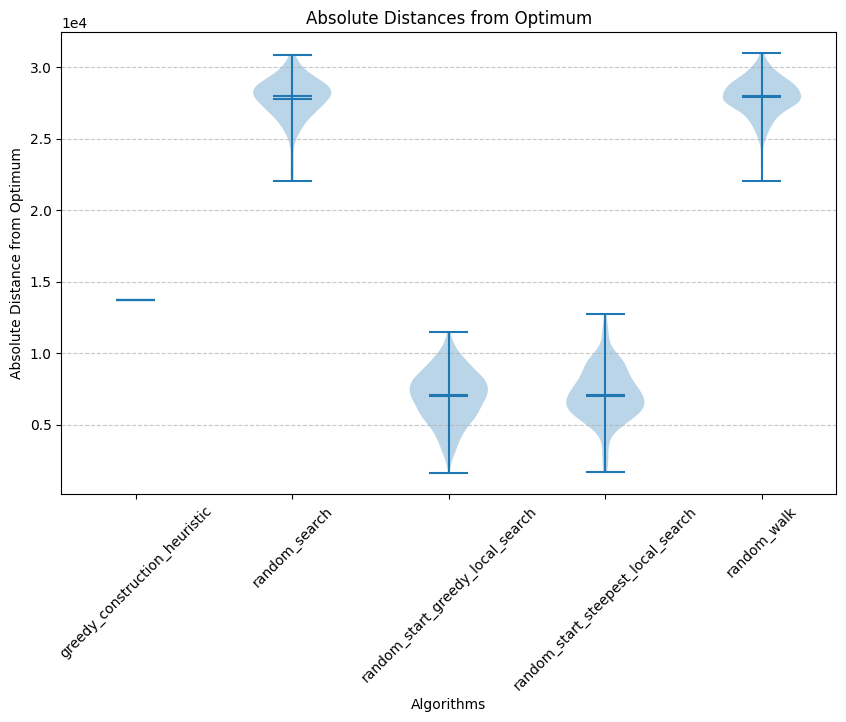

In [37]:
# Plotting violin plots of absolute distances from optimum for each algorithm
plt.figure(figsize=(10, 6))
plt.title("Absolute Distances from Optimum")
plt.ylabel("Absolute Distance from Optimum")
plt.xlabel("Algorithms")

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.violinplot(list(abs_distances_from_opt.values()), showmeans=True, showmedians=True)
plt.xticks(range(1, len(algos) + 1), algos)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))

plt.show()

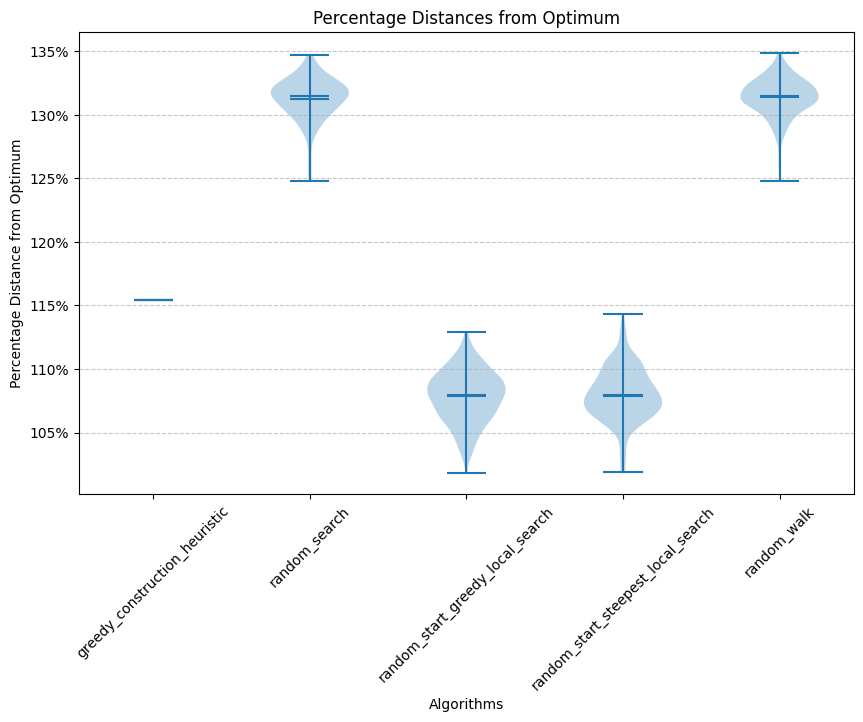

In [47]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Function to format y-axis labels as percentages
def percentage_formatter(x, _):
    return f"{x:.0f}%"

plt.figure(figsize=(10, 6))
plt.title("Percentage Distances from Optimum")
plt.ylabel("Percentage Distance from Optimum")
plt.xlabel("Algorithms")

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Violin plot
plt.violinplot(list(percentage_distances_from_opt.values()), showmeans=True, showmedians=True)

# Set x-tick labels
plt.xticks(range(1, len(algos) + 1), algos)

# Apply percentage formatting to y-axis
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(percentage_formatter))

plt.show()


32
10044
949
7254
10085


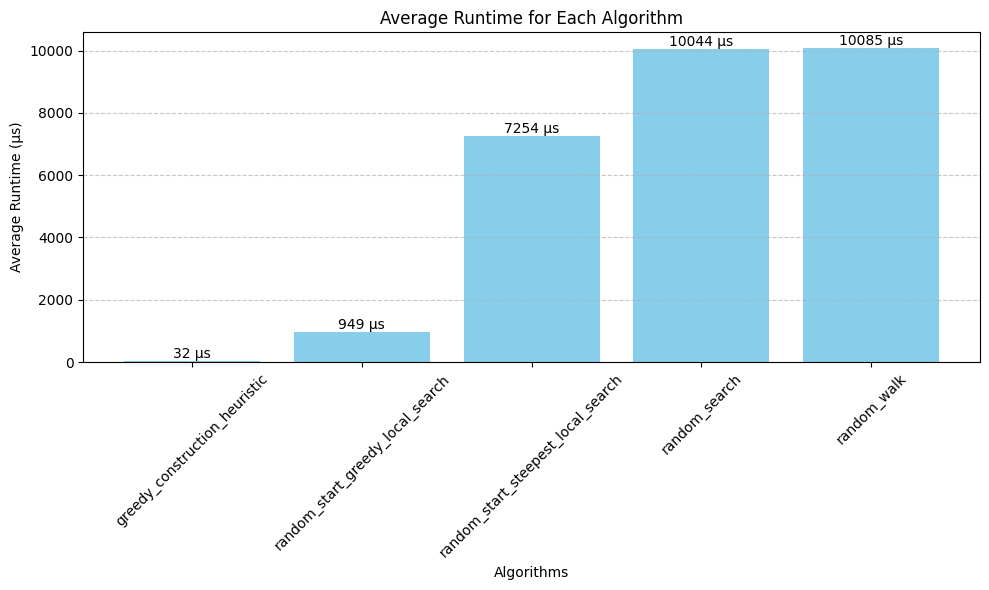

In [57]:

for algo in algos:
    print(data[algo].avg_runtime)

# bar plot of average runtime for each algorithm
plt.figure(figsize=(10, 6))
plt.title("Average Runtime for Each Algorithm")
plt.ylabel("Average Runtime (μs)")
plt.xlabel("Algorithms")

# sort barplots by value


sorted_algos = sorted(algos, key=lambda x: data[x].avg_runtime)
sorted_runtimes = [data[algo].avg_runtime for algo in sorted_algos]
plt.bar(sorted_algos, sorted_runtimes, color='skyblue')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))

# add text to bar
for i, runtime in enumerate(sorted_runtimes):
    plt.text(i, runtime, f"{runtime} μs", ha='center', va='bottom')
plt.tight_layout()
plt.show()


random_start_greedy_local_search
Avg iterations: 52.665
random_start_steepest_local_search
Avg iterations: 21.205


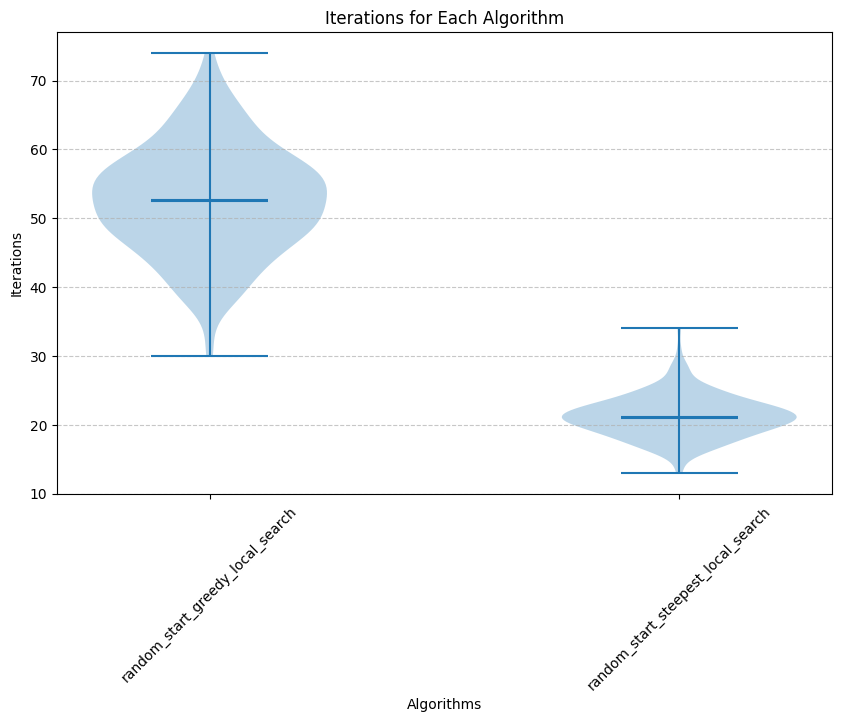

In [ ]:
iterations = []
for algo in algos:
    if "steepest_local" in algo or "greedy_local" in algo:
        print(algo)
        runs = data[algo].runs
        avg_iterations = []
        for run in runs:
            avg_iterations.append(run.iterations)
        a = np.mean(avg_iterations)
        print(f"Avg iterations: {a}")
        iterations.append(avg_iterations)

# Plotting violin plots of iterations for each algorithm
plt.figure(figsize=(10, 6))
plt.title("Iterations for Each Algorithm")
plt.ylabel("Iterations")
plt.xlabel("Algorithms")

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.violinplot(iterations, showmeans=True, showmedians=True)
plt.xticks(range(1, len(iterations) + 1), [algo for algo in algos if "steepest_local" in algo or "greedy_local" in algo])
# plt.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))

plt.show()


In [76]:
# compare quality of best and worst for greedy and steepest

greedy_best_score = None
steepest_best_score = None

greedy_worst_score = None
steepest_worst_score = None

for algo in algos:
    if "greedy_local" in algo:
        greedy_best_run = data[algo].best_run
        greedy_best_score = greedy_best_run.final_score
        greedy_worst_run = data[algo].worst_run
        greedy_worst_score = greedy_worst_run.final_score

    if "steepest_local" in algo:
        steepest_best_run = data[algo].best_run
        steepest_best_score = steepest_best_run.final_score
        steepest_worst_run = data[algo].worst_run
        steepest_worst_score = steepest_worst_run.final_score


print(f"Greedy best score: {greedy_best_score}")
print(f"Steepest best score: {steepest_best_score}")  
print(f"Greedy worst score: {greedy_worst_score}")
print(f"Steepest worst score: {steepest_worst_score}")


Greedy best score: 90520
Steepest best score: 90600
Greedy worst score: 100360
Steepest worst score: 101640
